<a href="https://colab.research.google.com/github/SundharessB/Speech-Recognition/blob/main/2348564_SPRLab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 1**

##  (a) Generate a basic sinusoidal signal in the time domain:

### importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Signal Characteristics

- `Fs` samples per second taken from continuous signal to convert it to a discrete-time signal.

In [2]:
sampling_frequency = 1000  # Samples per second
signal_duration = 1  # Seconds
signal_frequency = 5  # Hertz
time_vector = np.linspace(0, signal_duration, int(sampling_frequency * signal_duration), endpoint=False)  # Time in seconds
signal_amplitude = 1


Creating Signal

- `signal = A⋅sin(2πft)`
  

In [3]:
signal = signal_amplitude * np.sin(2 * np.pi * signal_frequency * time_vector)


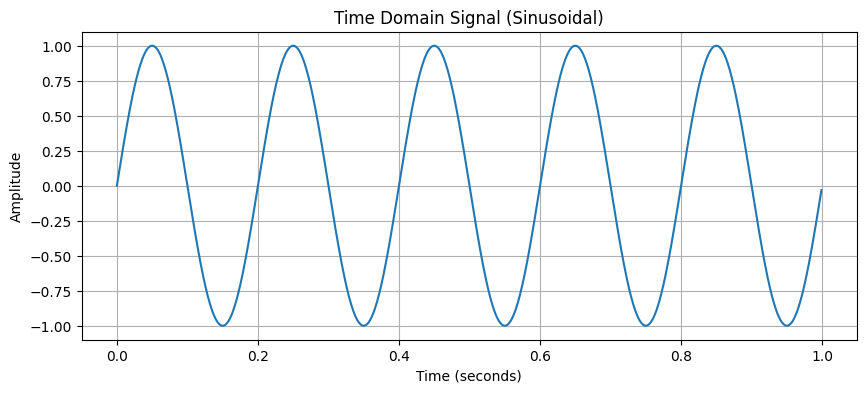

In [4]:
plt.figure(figsize=(10, 4))
plt.plot(time_vector, signal)
plt.title('Time Domain Signal (Sinusoidal)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

the image shows a sinusoidal signal with a frequency of 5 Hz, an amplitude of approximately 1.0

## (c) Compute the Discrete-Time Fourier Transform (DTFT) and plot the continuous frequency spectrum:


**Descrete-Time Fourier Transform** (continuous frequency)

It provides a continuous representation of signal's frequncy content.

- computed using Fast Fourier Transform, which gives frequency representation.
- `[-Fs/2, Fs/2]` frequency vector with lenght equal to `time` vector above
  - frequencies of signal components range from negative to positive, corresponding exponential terms (sines, cosines) in Fourier series
  - negative frequency relates to phase of signal
  - Fs/2 is Nyquist frequency, half the sampling rate so highest frequency that can be resolved in descrete-time system without aliasing
- `np.fft.fft(signal)` transforms from time domain to frequency domain.
- `/len(signal)` nomalizes output of FFT by length of signal, so amplitude of frequency components are scaled appropriately.
- `fftshift` shifts zero frequency component to center of spectrum


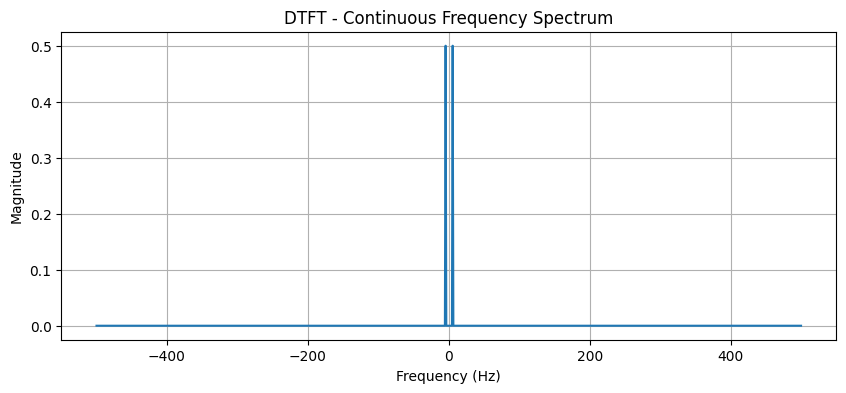

In [5]:
# Discrete-Time Fourier Transform (DTFT)
frequency_vector = np.linspace(-sampling_frequency / 2, sampling_frequency / 2, len(time_vector))
shifted_fft = np.fft.fftshift(np.fft.fft(signal) / len(signal))

plt.figure(figsize=(10, 4))
plt.plot(frequency_vector, np.abs(shifted_fft))
plt.title("DTFT - Continuous Frequency Spectrum")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


Discrete Fourier Transform (DFT)

- gives discrete set of frequency components
- fft output is symmetric for real signals
- gives out discrete frequency components, each corresponding to some speficic frequency bin. frequncy for the k<sub>th</sub> bin is:
  - f<sub>k</sub> = <sup>k</sup>/<sub>N</sub> * F<sub>s</sub>

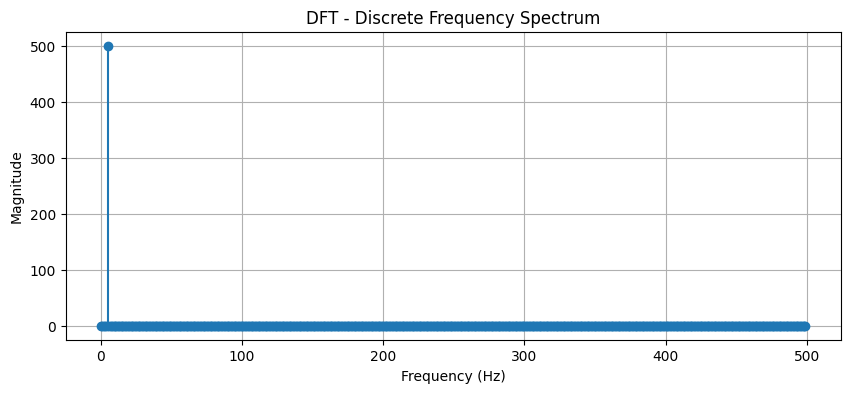

In [9]:
signal_fft = np.fft.fft(signal)
frequency_bins = np.fft.fftfreq(len(signal), 1 / sampling_frequency)

plt.figure(figsize=(10, 4))
plt.stem(frequency_bins[:len(signal) // 2], np.abs(signal_fft[:len(signal) // 2]), basefmt=" ")
plt.title('DFT - Discrete Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


#**Question 2**

In [11]:
sampling_frequency = 1000  # Samples per second
signal_duration = 1  # Seconds

The composite signal is the combination of three sinusodal signals with frequencies 5, 20, 50 Hz.

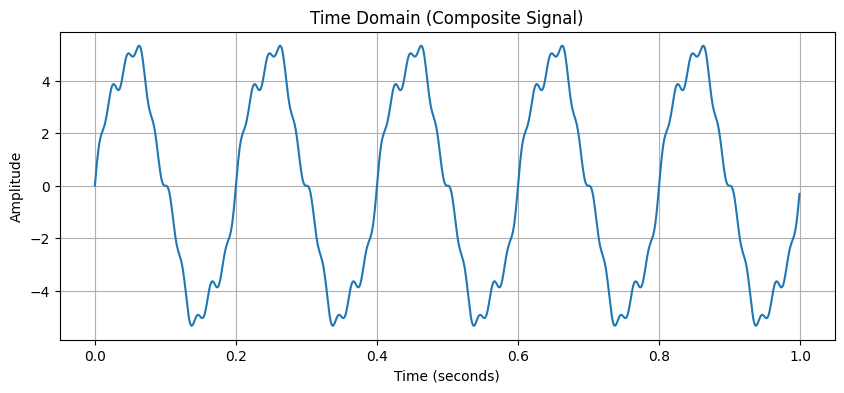

In [12]:
def generate_signal(amplitude, frequency):
  time_vector = np.linspace(0, signal_duration, int(sampling_frequency * signal_duration), endpoint=False)
  return amplitude * np.sin(2 * np.pi * frequency * time_vector)

signal_1 = generate_signal(amplitude=5, frequency=5)
signal_2 = generate_signal(amplitude=0.5, frequency=20)
signal_3 = generate_signal(amplitude=0.3, frequency=50)

composite_signal = signal_1 + signal_2 + signal_3

plt.figure(figsize=(10, 4))
plt.plot(time_vector, composite_signal)
plt.title("Time Domain (Composite Signal)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

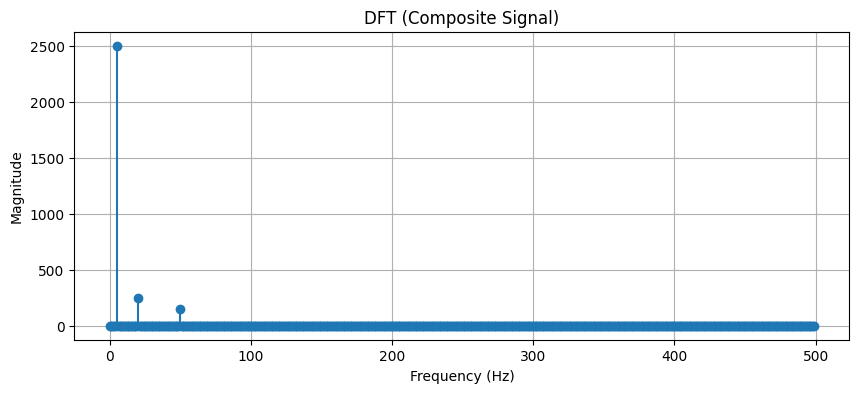

In [13]:
composite_signal_fft = np.fft.fft(composite_signal)
frequency_bins = np.fft.fftfreq(len(composite_signal), 1 / sampling_frequency)

plt.figure(figsize=(10, 4))
plt.stem(frequency_bins[:len(composite_signal) // 2], np.abs(composite_signal_fft[:len(composite_signal) // 2]), basefmt=" ")
plt.title("DFT (Composite Signal)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

The plot shows the initial frequencies 5, 20 and 50 Hz are present in the composite signal.

The Magnitude represents how much energy or strength the signal contains at the corresponding frequency *f<sub>k</sub>*.

# **Question 3 & 4**

In [14]:
sampling_frequency = 1000  # Samples per second
signal_duration = 1  # Seconds
time_vector = np.linspace(0, signal_duration, int(sampling_frequency * signal_duration), endpoint=False)
time_constant = 0.2  # Seconds for exponential decay

**Exponentially Decaying Signal**

x(t) = e<sup>-<sup>t</sup>/<sub>τ<sup></sup>

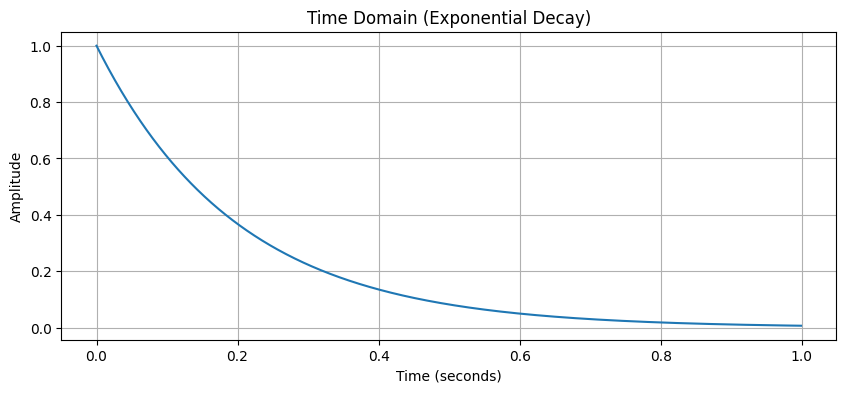

In [15]:
# Exponentially Decaying Signal
exponential_signal = np.exp(-time_vector / time_constant)

plt.figure(figsize=(10, 4))
plt.plot(time_vector, exponential_signal)
plt.title("Time Domain (Exponential Decay)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()



# DTFT



DTFT provides a continuous frequency representation allowing us to observe how energy is distributed across all possible frequencies, which is useful for analysing a signal's theoretical spectrum.

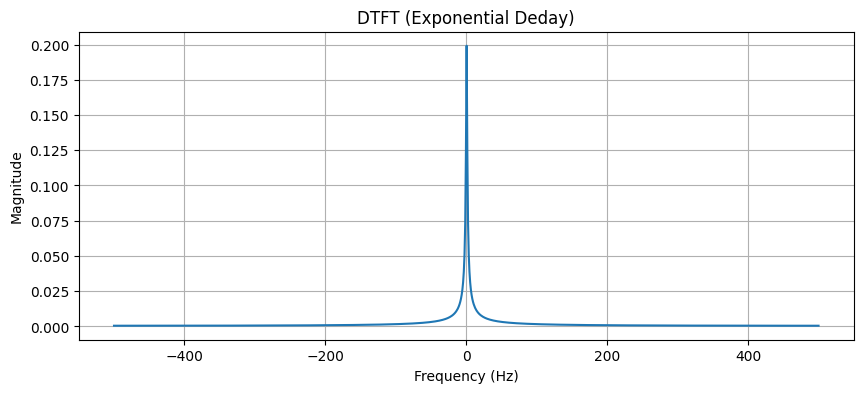

In [16]:
frequency_vector = np.linspace(-sampling_frequency / 2, sampling_frequency / 2, len(time_vector))
shifted_fft = np.fft.fftshift(np.fft.fft(exponential_signal) / len(exponential_signal))

plt.figure(figsize=(10, 4))
plt.plot(frequency_vector, np.abs(shifted_fft))
plt.title("DTFT (Exponential Deday)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

#DFT

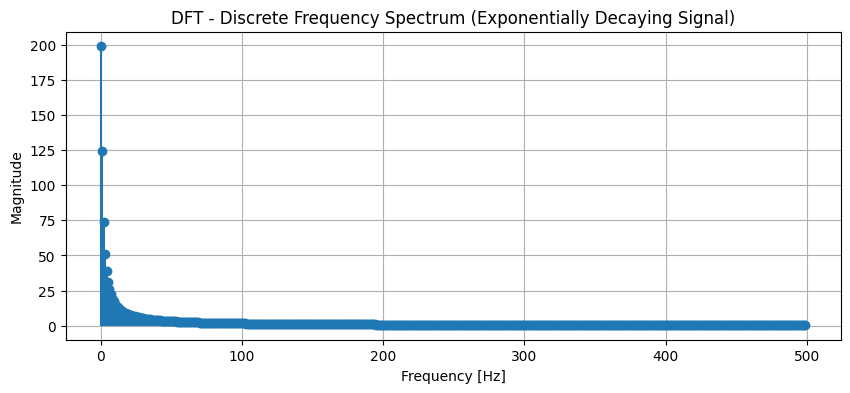

In [17]:
exponential_signal_dft = np.fft.fft(exponential_signal)
frequency_bins = np.fft.fftfreq(len(exponential_signal), 1 / sampling_frequency)

plt.figure(figsize=(10, 4))
plt.stem(frequency_bins[:len(exponential_signal)//2], np.abs(exponential_signal_dft[:len(exponential_signal)//2]), basefmt=" ")
plt.title('DFT - Discrete Frequency Spectrum (Exponentially Decaying Signal)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


This shows that exponentially decaying signal contains many high-frequency components, due to rapid changes or decays in the time domain correspond to higher frequencies int the frequency domain.

Most of the energy is concentrated at low frequencies because the signal is smooth and has no rapid oscillations.

A rapidly decaying signal (small τ) gives a wider spectrum, and slowly decaying signal (large τ) concentrates energy at lower frequencies.
